In [1]:
# Analytical Tools
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# General Utilities
import math
import json
import pprint
import itertools
import importlib

# Some settings
from IPython.display import Markdown, display
log = pprint.pprint
space = lambda: print()
printmd = lambda text: display(Markdown(text))
%matplotlib inline

def set_pandas_display_options() -> None:
    """Set pandas display options."""
    display = pd.options.display

    display.max_columns = 1000
    display.max_rows = 1000
    display.max_colwidth = 199
    display.width = 1000
    # display.precision = 2  # set as needed

set_pandas_display_options()

In [2]:
non_insight = ['What day follows the day before yesterday if two days from now will be Sunday?',
'Ben spent $42 for shoes. This was $14 less than what he spent for a shirt and twice more expensive than the tie. The tie was $20 cheaper than the jeans. How much was the jeans?',
'Next week I am going to have lunch with my friend, visit the new art gallery, go to the Social Security office, and have my teeth checked at the dentist. My friend cannot meet me on Wednesday; the Social Security office is closed weekends; the dentist has office hours only on Tuesday, Friday, and Saturday; the art gallery is closed Tuesday, Thursday, and weekends. On what single day can I do everything I have planned?',
'A group of soldiers were standing facing west. Their sergeant shouted at them: Right turn! U-turn! Left turn! U-turn! Right turn! U-turn! Left turn! Right turn! In which direction are they now facing?',
'The following verse spells out a word. I am a food for you and me. My first letter is in pat but not in tar. My second letter is in stream but not in smart. My third letter is in giraffe but not in fridge. My fourth letter is in treat but not in absent. What is the word that this verse described?'];
s1 = 'thursday|41|friday|south|north|pear'

insight = ['A man is reading a book when the lights go off but even although the room is pitch dark the man goes on reading. How?',
'Alex and Casey are blood relatives of Bobbie. However, Alex and Casey are not blood relatives at all. How is this possible?',
'Mr. Hardy slipped and fell off a sixty-foot ladder onto the concrete floor below. However, he did not injure himself in any way. How is this possible?',
'Sid Shady was working for a large construction company that was very concerned about employee theft. Someone tipped company security that Shady was the man to watch. Each night, he passed through security with a wheelbarrow full of scrap lumber, discarded electrical wires, and chunks of concrete. The security guards checked the contents daily, but could find nothing of value. What was Shady stealing?',
'Joe Fan has no psychic powers but he can tell you the score of any football game before it starts. How?'];
 
anagram = ['Solve this anagram: NCRBOA', 
						'Solve this anagram: AYKAWLJ', 
						'Solve this anagram: EVANG',
						'Solve this anagram: MARNOD',
						'Solve this anagram: AALRYS']
s2 = 'carbon|jaywalk|vegan|random|salary'

In [3]:
with open('pilot2.json') as json_file:
    data = json.load(json_file)    

In [4]:
questions_non_insight = []
answers_non_insight = [] #whether people typed done or skip
solutions_non_insight = []
confidence_non_insight = []
difficulty_non_insight = []
aha_non_insight = []
rts_non_insight = []
close_non_insight = []

questions_insight = []
answers_insight = []
solutions_insight = []
confidence_insight = []
difficulty_insight = []
aha_insight = []
rts_insight = []
close_insight = []

questions_anagram = []
solutions_anagram = []
answers_anagram = []
confidence_anagram = []
difficulty_anagram = []
aha_anagram = []
rts_anagram = []
close_anagram = []

for i in range(len(data)): #go thru the subjects
    if len(data[i]['data']) > 3: #only look at subjects that finished the task (and not just started without finishing)
        if int(data[i]['data'][3]['responses'][7]) == 3: #passed attention/quiz check, hooray!
            
            k = 5
            for j in range(3):
                question = data[i]['data'][0]['problems_seen'][j] #store the question seen by the participant
                answers = []
                answer = data[i]['data'][k]['responses']
                rt = 0 
                close = []

                while True:
                    answer = data[i]['data'][k]['responses']
                    answers.append(answer)
                    k = k+1
                    close.append(int(data[i]['data'][k]['response']))
                    if 'done' not in answer.lower() and 'skip' not in answer.lower():
                        rt = rt+10
                        k = k+1
                    else:
                        rt = rt + data[i]['data'][k]['rt']/1000
                        k = k+1
                        break
                
                solution = data[i]['data'][k]['responses'] #store people's solution here
                k = k+1
                response = data[i]['data'][k]['responses'] #store people's responses to the judgment questions here
                k = k+2 #move to the next question
                
                if question in non_insight:   
                    questions_non_insight.append(question)
                    answers_non_insight.append(answers)
                    solutions_non_insight.append(solution)
                    rts_non_insight.append(rt)
                    confidence_non_insight.append(int(response[6])+1)
                    difficulty_non_insight.append(int(response[13])+1)
                    aha_non_insight.append(int(response[20])+1)
                    close_non_insight.append(close)
                    
                elif question in insight:
                    questions_insight.append(question)
                    answers_insight.append(answers)
                    solutions_insight.append(solution)
                    rts_insight.append(rt)
                    confidence_insight.append(int(response[6])+1)
                    difficulty_insight.append(int(response[13])+1)
                    aha_insight.append(int(response[20])+1)
                    close_insight.append(close)

                elif question in anagram:
                    questions_anagram.append(question)
                    answers_anagram.append(answers)
                    solutions_anagram.append(solution)
                    rts_anagram.append(rt)
                    confidence_anagram.append(int(response[6])+1)
                    difficulty_anagram.append(int(response[13])+1)
                    aha_anagram.append(int(response[20])+1)
                    close_anagram.append(close)
        else:
            print('bad subject!')

bad subject!


Convert data into df

In [5]:
d = {'questions':questions_non_insight,
     'answers':answers_non_insight, 
     'solutions': solutions_non_insight,
     'rts': rts_non_insight,
     'confidence': confidence_non_insight, 
     'difficulty': difficulty_non_insight, 
     'aha': aha_non_insight,
     'close': close_non_insight}

d2 = {'questions':questions_insight,
     'answers':answers_insight, 
      'solutions': solutions_insight,
      'rts': rts_insight,
     'confidence': confidence_insight, 
     'difficulty': difficulty_insight, 
     'aha': aha_insight,
     'close': close_insight}

d3 = {'questions':questions_anagram,
     'answers':answers_anagram, 
      'solutions': solutions_anagram,
     'rts': rts_anagram,
     'confidence': confidence_anagram, 
     'difficulty': difficulty_anagram, 
     'aha': aha_anagram,
     'close': close_anagram}

df_non_insight = pd.DataFrame(d)
df_insight = pd.DataFrame(d2)
df_anagram = pd.DataFrame(d3)

#Analyze only those responses for which people didn't leave a blank answer (len = 9) and said DONE (not SKIP)
df_non_insight_filtered = df_anagram_filtered = df_non_insight.loc[(df_non_insight['solutions'].str.contains(s1, case = False)==True)]
df_insight_filtered = df_insight.loc[(df_insight['confidence'] >= 4) & (df_insight['solutions'].str.len() > 9)]
df_anagram_filtered = df_anagram.loc[(df_anagram['solutions'].str.contains(s2, case = False)==True)]

print(len(df_non_insight.index), len(df_non_insight_filtered.index))
print(len(df_insight.index), len(df_insight_filtered.index))
print(len(df_anagram.index), len(df_anagram_filtered.index))

49 33
49 28
49 29


To do -- [check ratio (increment per probe), difference between last rating and 100, and average plot of warmth rating for each problem]

In [6]:
dft3 = df_anagram.groupby(['questions']).agg(['mean', 'std', 'count'])
dft4 = df_anagram_filtered.groupby(['questions']).agg(['mean', 'std', 'count'])

d0 = {'anagrams': dft4.index,
     'percent solved':dft4['rts']['count'].values/dft3['rts']['count'].values,
     'solved count':dft4['rts']['count'].values, 
     'total count': dft3['rts']['count'].values,
     'mean RT': dft4['rts']['mean'].values,
     'mean difficulty': dft4['difficulty']['mean'].values}

dft5 = pd.DataFrame(d0)
dft5.sort_values('mean difficulty')

,anagrams,percent solved,solved count,total count,mean RT,mean difficulty
1,Solve this anagram: AYKAWLJ,0.454545,5,11,33.539260,2.200000
3,Solve this anagram: MARNOD,0.777778,7,9,27.689629,2.428571
0,Solve this anagram: AALRYS,0.545455,6,11,25.407867,3.000000
2,Solve this anagram: EVANG,0.600000,6,10,49.952100,3.666667
4,Solve this anagram: NCRBOA,0.625000,5,8,26.850200,4.000000


In [7]:
dft3 = df_non_insight.groupby(['questions']).agg(['mean', 'std', 'count'])
dft4 = df_non_insight_filtered.groupby(['questions']).agg(['mean', 'std', 'count'])

d0 = {'problems': dft4.index,
     'percent solved':dft4['rts']['count'].values/dft3['rts']['count'].values,
     'solved count':dft4['rts']['count'].values, 
     'total count': dft3['rts']['count'].values,
     'mean RT': dft4['rts']['mean'].values,
     'mean difficulty': dft4['difficulty']['mean'].values}

dft5 = pd.DataFrame(d0)
dft5.sort_values('mean difficulty')

,problems,percent solved,solved count,total count,mean RT,mean difficulty
1,Ben spent $42 for shoes. This was $14 less than what he spent for a shirt and twice more expensive than the tie. The tie was $20 cheaper than the jeans. How much was the jeans?,0.555556,5,9,41.021700,3.000000
3,The following verse spells out a word. I am a food for you and me. My first letter is in pat but not in tar. My second letter is in stream but not in smart. My third letter is in giraffe but not ...,0.642857,9,14,64.049033,3.111111
0,A group of soldiers were standing facing west. Their sergeant shouted at them: Right turn! U-turn! Left turn! U-turn! Right turn! U-turn! Left turn! Right turn! In which direction are they now fa...,0.800000,4,5,56.338875,3.500000
2,"Next week I am going to have lunch with my friend, visit the new art gallery, go to the Social Security office, and have my teeth checked at the dentist. My friend cannot meet me on Wednesday; th...",0.750000,9,12,70.685256,3.555556
4,What day follows the day before yesterday if two days from now will be Sunday?,0.666667,6,9,34.773833,4.000000


In [25]:
dft3 = df_insight.groupby(['questions']).agg(['mean', 'std', 'count'])
dft4 = df_insight_filtered.groupby(['questions']).agg(['mean', 'std', 'count'])

d0 = {'problems': dft4.index,
     'percent solved':dft4['rts']['count'].values/dft3['rts']['count'].values,
     'solved count':dft4['rts']['count'].values, 
     'total count': dft3['rts']['count'].values,
     'mean RT': dft4['rts']['mean'].values,
     'mean difficulty': dft4['difficulty']['mean'].values,
     'aha': dft4['aha']['mean'].values}

dft5 = pd.DataFrame(d0)
dft5.sort_values('mean difficulty')

,problems,percent solved,solved count,total count,mean RT,mean difficulty,aha
1,"Alex and Casey are blood relatives of Bobbie. However, Alex and Casey are not blood relatives at all. How is this possible?",0.500000,4,8,32.890825,2.500000,3.500000
4,"Sid Shady was working for a large construction company that was very concerned about employee theft. Someone tipped company security that Shady was the man to watch. Each night, he passed through...",0.600000,6,10,31.656067,3.166667,4.000000
2,Joe Fan has no psychic powers but he can tell you the score of any football game before it starts. How?,0.500000,7,14,21.009486,3.428571,3.000000
0,A man is reading a book when the lights go off but even although the room is pitch dark the man goes on reading. How?,0.600000,6,10,38.542750,3.666667,4.333333
3,"Mr. Hardy slipped and fell off a sixty-foot ladder onto the concrete floor below. However, he did not injure himself in any way. How is this possible?",0.714286,5,7,27.320980,4.400000,4.600000


Create separate dfs for each non insight question

In [9]:
df1 = df_non_insight_filtered.loc[(df_non_insight['questions'].str.contains("yesterday", case=False))]
df2 = df_non_insight_filtered.loc[(df_non_insight['questions'].str.contains("giraffe", case=False))]
df3 = df_non_insight_filtered.loc[(df_non_insight['questions'].str.contains("soldiers", case=False))]
df4 = df_non_insight_filtered.loc[(df_non_insight['questions'].str.contains("security", case=False))]
df5 = df_non_insight_filtered.loc[(df_non_insight['questions'].str.contains("cheaper", case=False))]

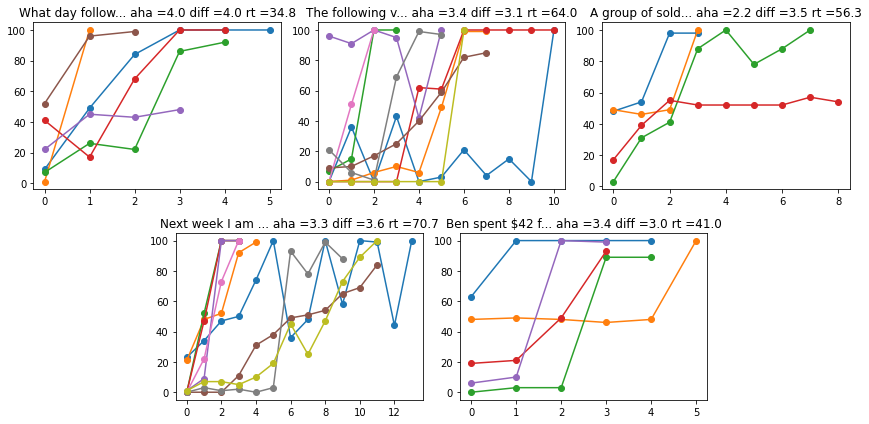

In [10]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 6)

for i in range(0, 5):
    if i < 3:
        ax = plt.subplot(gs[0, 2 * i:2 * i + 2])
    else:
        ax = plt.subplot(gs[1, 2 * i - 11:2 * i + 2 - 11])
    
    if i == 0:
        for j, row in df1.iterrows():
            plt.plot(row['close'], '-o')
        plt.title(df1['questions'].iloc[0][0:15]+'...'+' aha ='+str(round(df1['aha'].mean(),1))
                 +' diff ='+str(round(df1['difficulty'].mean(),1))+' rt ='+str(round(df1['rts'].mean(),1)))
    elif i == 1:
        for j, row in df2.iterrows():
            plt.plot(row['close'], '-o')
        plt.title(df2['questions'].iloc[0][0:15]+'...'+' aha ='+str(round(df2['aha'].mean(),1))
                 +' diff ='+str(round(df2['difficulty'].mean(),1))+' rt ='+str(round(df2['rts'].mean(),1)))
    elif i == 2:
        for j, row in df3.iterrows():
            plt.plot(row['close'], '-o')
        plt.title(df3['questions'].iloc[0][0:15]+'...'+' aha ='+str(round(df3['aha'].mean(),1))
                 +' diff ='+str(round(df3['difficulty'].mean(),1))+' rt ='+str(round(df3['rts'].mean(),1)))
    elif i == 3:
        for j, row in df4.iterrows():
            plt.plot(row['close'], '-o')
        plt.title(df4['questions'].iloc[0][0:15]+'...'+' aha ='+str(round(df4['aha'].mean(),1))
                 +' diff ='+str(round(df4['difficulty'].mean(),1))+' rt ='+str(round(df4['rts'].mean(),1)))
    elif i == 4:
        for j, row in df5.iterrows():
            plt.plot(row['close'], '-o')
        plt.title(df5['questions'].iloc[0][0:15]+'...'+' aha ='+str(round(df5['aha'].mean(),1))
                 +' diff ='+str(round(df5['difficulty'].mean(),1))+' rt ='+str(round(df5['rts'].mean(),1)))
            
plt.tight_layout()
plt.show()

In [11]:
df6 = df_anagram_filtered.loc[(df_anagram['questions'].str.contains("AALRYS", case=False))]
df7 = df_anagram_filtered.loc[(df_anagram['questions'].str.contains("AYKAWLJ", case=False))]
df8 = df_anagram_filtered.loc[(df_anagram['questions'].str.contains("NCRBOA", case=False))]
df9 = df_anagram_filtered.loc[(df_anagram['questions'].str.contains("MARNOD", case=False))]
df10 = df_anagram_filtered.loc[(df_anagram['questions'].str.contains("EVANG", case=False))]

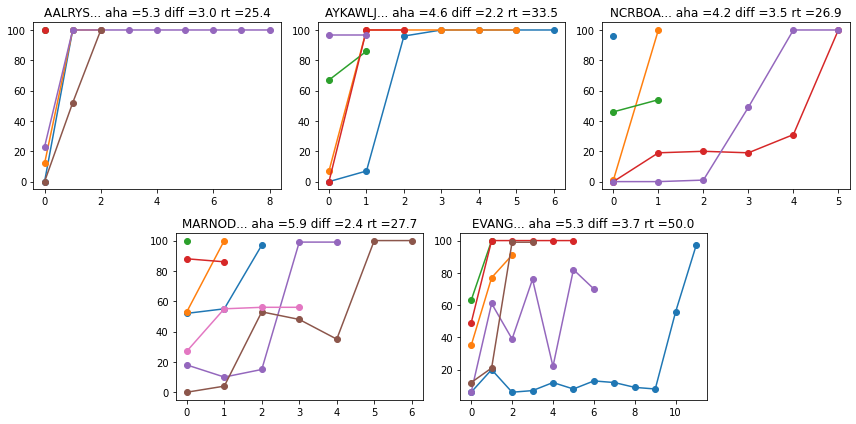

In [12]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 6)

for i in range(0, 5):
    if i < 3:
        ax = plt.subplot(gs[0, 2 * i:2 * i + 2])
    else:
        ax = plt.subplot(gs[1, 2 * i - 11:2 * i + 2 - 11])
    
    if i == 0:
        for j, row in df6.iterrows():
            plt.plot(row['close'], '-o')
        plt.title(df6['questions'].iloc[0][20:30]+'...'+' aha ='+str(round(df6['aha'].mean(),1))
                 +' diff ='+str(round(df6['difficulty'].mean(),1))+' rt ='+str(round(df6['rts'].mean(),1)))
    elif i == 1:
        for j, row in df7.iterrows():
            plt.plot(row['close'], '-o')
        plt.title(df7['questions'].iloc[0][20:30]+'...'+' aha ='+str(round(df7['aha'].mean(),1))
                 +' diff ='+str(round(df7['difficulty'].mean(),1))+' rt ='+str(round(df7['rts'].mean(),1)))
    elif i == 2:
        for j, row in df8.iterrows():
            plt.plot(row['close'], '-o')
        plt.title(df8['questions'].iloc[0][20:30]+'...'+' aha ='+str(round(df8['aha'].mean(),1))
                 +' diff ='+str(round(df3['difficulty'].mean(),1))+' rt ='+str(round(df8['rts'].mean(),1)))
    elif i == 3:
        for j, row in df9.iterrows():
            plt.plot(row['close'], '-o')
        plt.title(df9['questions'].iloc[0][20:30]+'...'+' aha ='+str(round(df9['aha'].mean(),1))
                 +' diff ='+str(round(df9['difficulty'].mean(),1))+' rt ='+str(round(df9['rts'].mean(),1)))
    elif i == 4:
        for j, row in df10.iterrows():
            plt.plot(row['close'], '-o')
        plt.title(df10['questions'].iloc[0][20:30]+'...'+' aha ='+str(round(df10['aha'].mean(),1))
                 +' diff ='+str(round(df10['difficulty'].mean(),1))+' rt ='+str(round(df10['rts'].mean(),1)))
            
plt.tight_layout()
plt.show()

In [13]:
df6 = df_insight_filtered.loc[(df_insight['questions'].str.contains("Casey", case=False))]
df7 = df_insight_filtered.loc[(df_insight['questions'].str.contains("psychic", case=False))]
df8 = df_insight_filtered.loc[(df_insight['questions'].str.contains("shady", case=False))]
df9 = df_insight_filtered.loc[(df_insight['questions'].str.contains("pitch", case=False))]
df10 = df_insight_filtered.loc[(df_insight['questions'].str.contains("hardy", case=False))]

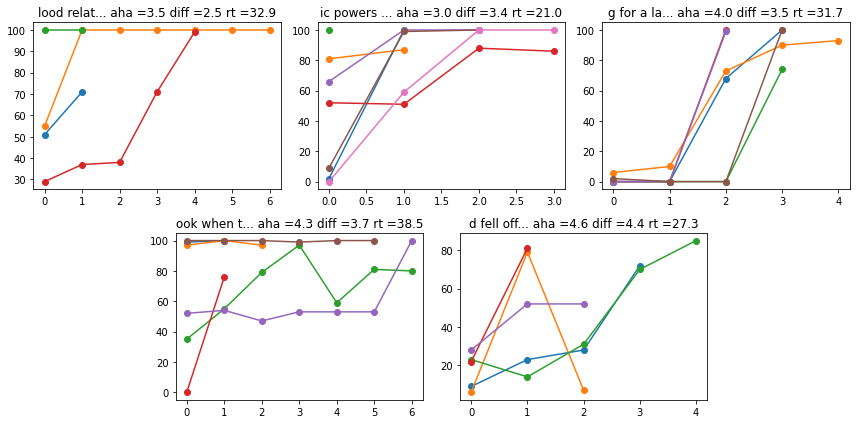

In [14]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 6)

for i in range(0, 5):
    if i < 3:
        ax = plt.subplot(gs[0, 2 * i:2 * i + 2])
    else:
        ax = plt.subplot(gs[1, 2 * i - 11:2 * i + 2 - 11])
    
    if i == 0:
        for j, row in df6.iterrows():
            plt.plot(row['close'], '-o')
        plt.title(df6['questions'].iloc[0][20:30]+'...'+' aha ='+str(round(df6['aha'].mean(),1))
                 +' diff ='+str(round(df6['difficulty'].mean(),1))+' rt ='+str(round(df6['rts'].mean(),1)))
    elif i == 1:
        for j, row in df7.iterrows():
            plt.plot(row['close'], '-o')
        plt.title(df7['questions'].iloc[0][20:30]+'...'+' aha ='+str(round(df7['aha'].mean(),1))
                 +' diff ='+str(round(df7['difficulty'].mean(),1))+' rt ='+str(round(df7['rts'].mean(),1)))
    elif i == 2:
        for j, row in df8.iterrows():
            plt.plot(row['close'], '-o')
        plt.title(df8['questions'].iloc[0][20:30]+'...'+' aha ='+str(round(df8['aha'].mean(),1))
                 +' diff ='+str(round(df3['difficulty'].mean(),1))+' rt ='+str(round(df8['rts'].mean(),1)))
    elif i == 3:
        for j, row in df9.iterrows():
            plt.plot(row['close'], '-o')
        plt.title(df9['questions'].iloc[0][20:30]+'...'+' aha ='+str(round(df9['aha'].mean(),1))
                 +' diff ='+str(round(df9['difficulty'].mean(),1))+' rt ='+str(round(df9['rts'].mean(),1)))
    elif i == 4:
        for j, row in df10.iterrows():
            plt.plot(row['close'], '-o')
        plt.title(df10['questions'].iloc[0][20:30]+'...'+' aha ='+str(round(df10['aha'].mean(),1))
                 +' diff ='+str(round(df10['difficulty'].mean(),1))+' rt ='+str(round(df10['rts'].mean(),1)))
            
plt.tight_layout()
plt.show()

<ErrorbarContainer object of 3 artists>

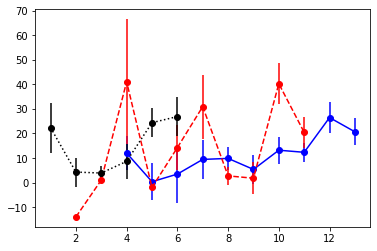

In [19]:
increment_non_insight = []
close_non_insight = []

for i in range(len(df_non_insight_filtered.index)):
    b = df_non_insight_filtered['close'].iloc[i]
    increment_non_insight.append(np.diff(b))
    close_non_insight.append(b)

n = 10
a = increment_non_insight
m = [li[::-1] for li in a]
l = [np.array(xi) for xi in m]
df_2 = pd.DataFrame(l)
y = np.flip(df_2.mean(0).values)
x = np.array(range(len(y)))+1
e = np.flip(df_2.sem(0,ddof=0).values)
c = np.flip(df_2.count(0).values)
plt.errorbar(x[-n:], y[-n:], e[-n:], linestyle='-', marker='o', color = 'blue')

increment_anagram = []
close_anagram = []
for i in range(len(df_anagram_filtered.index)):
    b = df_anagram_filtered['close'].iloc[i]
    increment_anagram.append(np.diff(b))
    close_anagram.append(b)

a = increment_anagram
m = [li[::-1] for li in a]
l = [np.array(xi) for xi in m]
df_1 = pd.DataFrame(l)
y = np.flip(df_1.mean(0).values)
x = np.array(range(len(y)))+1
e = np.flip(df_1.sem(0,ddof=0).values)
c = np.flip(df_1.count(0).values)
plt.errorbar(x[-n:], y[-n:], e[-n:], linestyle='--', marker='o', color = 'red')

increment_insight = []
close_insight = []
for i in range(len(df_insight_filtered.index)):
    b = df_insight_filtered['close'].iloc[i]
    increment_insight.append(np.diff(b))
    close_insight.append(b)

a = increment_insight
m = [li[::-1] for li in a]
l = [np.array(xi) for xi in m]
df_3 = pd.DataFrame(l)
y = np.flip(df_3.mean(0).values)
x = np.array(range(len(y)))+1
e = np.flip(df_3.sem(0,ddof=0).values)
c = np.flip(df_3.count(0).values)
plt.errorbar(x[-n:], y[-n:], e[-n:], linestyle=':', marker='o', color = 'black')

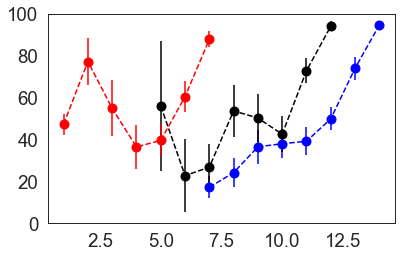

In [24]:
import seaborn as sns
sns.set(style="white", font_scale=1.7, rc={'figure.figsize':(6,4), 
                                              "grid.linewidth": 1, "axes.linewidth": 1,})

a = close_non_insight
n = 8 #how many points
m = [li[::-1] for li in a]
l = [np.array(xi) for xi in m]
non_insight_data = l
df_1 = pd.DataFrame(l)
y = np.flip(df_1.mean(0).values)
e = np.flip(df_1.sem(0,ddof=0).values)
c = np.flip(df_1.count(0).values)
x = np.array(range(len(y)))+1
plt.errorbar(x[-n:], y[-n:], e[-n:], linestyle='--', marker='o', color = 'blue', markersize=9)
plt.ylim([0,100])

a = close_anagram
m = [li[::-1] for li in a]
l = [np.array(xi) for xi in m]
df_1 = pd.DataFrame(l)
y = np.flip(df_1.mean(0).values)
e = np.flip(df_1.sem(0,ddof=0).values)
c = np.flip(df_1.count(0).values)
x = np.array(range(len(y)))+1
plt.errorbar(x[-n:], y[-n:], e[-n:], linestyle='--', marker='o', color = 'black', markersize=9)
plt.ylim([0,100])

a = close_insight
m = [li[::-1] for li in a]
l = [np.array(xi) for xi in m]
df_1 = pd.DataFrame(l)
y = np.flip(df_1.mean(0).values)
e = np.flip(df_1.sem(0,ddof=0).values)
c = np.flip(df_1.count(0).values)
x = np.array(range(len(y)))+1
plt.errorbar(x[-n:], y[-n:], e[-n:], linestyle='--', marker='o', color = 'red', markersize=9)
plt.ylim([0,100])

plt.tight_layout()



In [28]:
df1 = df_non_insight_filtered.groupby(['questions', 'answers'], as_index=False).agg(['mean', 'count'])
df2 = df_insight_filtered.groupby(['questions', 'answers'], as_index=False).agg(['mean', 'count'])
df3 = df_anagram_filtered.groupby(['questions'], as_index=False).agg(['mean', 'count'])
df2

ValueError: no results

In [16]:
df1 = df_non_insight_filtered.groupby(['questions', 'answers'], as_index=False).agg(['mean', 'count'])
df2 = df_insight_filtered.groupby(['questions', 'answers'], as_index=False).agg(['mean', 'count'])
df3 = df_anagram_filtered.groupby(['questions'], as_index=False).agg(['mean', 'count'])
df2

ValueError: no results

Analyze only those responses for which people's confidence is greater than 5

In [29]:
print(df_non_insight["aha"].mean(),df_insight["aha"].mean(), df_anagram["aha"].mean())
print(df_non_insight["difficulty"].mean(),df_insight["difficulty"].mean(), df_anagram["difficulty"].mean())
print(df_non_insight["confidence"].mean(),df_insight["confidence"].mean(), df_anagram["confidence"].mean())

3.122448979591837 2.8979591836734695 3.9183673469387754
3.6530612244897958 4.26530612244898 4.020408163265306
5.244897959183674 3.673469387755102 4.836734693877551


In [30]:
print(df_non_insight_filtered["aha"].mean(),df_insight_filtered["aha"].mean(), df_anagram_filtered["aha"].mean())
print(df_non_insight_filtered["difficulty"].mean(),df_insight_filtered["difficulty"].mean(), df_anagram_filtered["difficulty"].mean())
print(df_non_insight_filtered["confidence"].mean(),df_insight_filtered["confidence"].mean(), df_anagram_filtered["confidence"].mean())

3.3636363636363638 3.857142857142857 5.137931034482759
3.4242424242424243 3.4642857142857144 3.0344827586206895
5.96969696969697 5.035714285714286 6.517241379310345


Plot distribution of curiosity ratings below

In [10]:
df_non_insight

,questions,answers,solutions,rts,confidence,difficulty,aha,close
0,What day follows the day before yesterday if two days from now will be Sunday?,"[{""Q0"":""""}, {""Q0"":""""}, {""Q0"":""""}, {""Q0"":""""}, {""Q0"":""Friday""}, {""Q0"":""DONE""}]","{""Q0"":""Friday""}",53.0427,5,4,2,"[9, 49, 84, 100, 100, 100]"
1,The following verse spells out a word. I am a food for you and me. My first letter is in pat but not in tar. My second letter is in stream but not in smart. My third letter is in giraffe but not ...,"[{""Q0"":""""}, {""Q0"":""""}, {""Q0"":""""}, {""Q0"":""""}, {""Q0"":""""}, {""Q0"":""""}, {""Q0"":""""}, {""Q0"":""""}, {""Q0"":""""}, {""Q0"":""""}, {""Q0"":""DONE""}]","{""Q0"":""PEAR""}",102.5511,7,5,5,"[0, 36, 0, 43, 0, 3, 21, 4, 15, 0, 100]"
2,What day follows the day before yesterday if two days from now will be Sunday?,"[{""Q0"":""""}, {""Q0"":""""}, {""Q0"":""DONE""}]","{""Q0"":""Wednesday""}",22.9881,6,4,5,"[34, 94, 100]"
3,What day follows the day before yesterday if two days from now will be Sunday?,"[{""Q0"":""""}, {""Q0"":""DONE""}]","{""Q0"":""Friday""}",12.6880,5,4,5,"[1, 100]"
4,"Next week I am going to have lunch with my friend, visit the new art gallery, go to the Social Security office, and have my teeth checked at the dentist. My friend cannot meet me on Wednesday; th...","[{""Q0"":""""}, {""Q0"":""""}, {""Q0"":""Done""}]","{""Q0"":""Tuesday""}",22.6660,1,6,1,"[4, 10, 41]"
5,A group of soldiers were standing facing west. Their sergeant shouted at them: Right turn! U-turn! Left turn! U-turn! Right turn! U-turn! Left turn! Right turn! In which direction are they now fa...,"[{""Q0"":""""}, {""Q0"":""""}, {""Q0"":""""}, {""Q0"":""Done""}]","{""Q0"":""South""}",32.9725,7,6,4,"[48, 54, 98, 98]"
6,"Next week I am going to have lunch with my friend, visit the new art gallery, go to the Social Security office, and have my teeth checked at the dentist. My friend cannot meet me on Wednesday; th...","[{""Q0"":""""}, {""Q0"":""""}, {""Q0"":""""}, {""Q0"":""""}, {""Q0"":""""}, {""Q0"":""friday""}, {""Q0"":""""}, {""Q0"":""""}, {""Q0"":""friday""}, {""Q0"":""""}, {""Q0"":""friday""}, {""Q0"":""friday""}, {""Q0"":""""}, {""Q0"":""skip""}]","{""Q0"":""friday""}",133.9453,4,6,3,"[23, 34, 47, 50, 74, 100, 36, 48, 100, 58, 100, 99, 44, 100]"
7,"Next week I am going to have lunch with my friend, visit the new art gallery, go to the Social Security office, and have my teeth checked at the dentist. My friend cannot meet me on Wednesday; th...","[{""Q0"":""""}, {""Q0"":""""}, {""Q0"":""""}, {""Q0"":""Frid""}, {""Q0"":""DONE""}]","{""Q0"":""Friday""}",43.7291,5,4,2,"[21, 48, 52, 92, 99]"
8,"Next week I am going to have lunch with my friend, visit the new art gallery, go to the Social Security office, and have my teeth checked at the dentist. My friend cannot meet me on Wednesday; th...","[{""Q0"":""""}, {""Q0"":""skip""}]","{""Q0"":""""}",12.2990,7,3,5,"[0, 4]"
9,The following verse spells out a word. I am a food for you and me. My first letter is in pat but not in tar. My second letter is in stream but not in smart. My third letter is in giraffe but not ...,"[{""Q0"":""""}, {""Q0"":""skip""}]","{""Q0"":""""}",13.9849,1,7,1,"[1, 0]"
